In [55]:
import pandas as pd
import numpy as np
import seaborn as sn

1.	Loading the data file using pandas. 

In [56]:
df=pd.read_csv('googleplaystore.csv')

2.	Checking for null values in the data. Getting the number of sum of null values for each column.

In [57]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [58]:
df.shape

(10841, 13)

3.	Drop records with nulls in any of the columns. 

In [59]:
df=df.dropna()
df.shape

(9360, 13)

4: 1A	Convert size column to numeric (remove strings k,M,Varies with device)

4: 1B convert M to k by multiplying with 1000

In [64]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('k', '') if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'nan') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('M', ''))*1000 if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x : float(x))
df['Size'].dtype

dtype('float64')

In [73]:
df_updated=df.dropna()
df_updated.shape

(7723, 13)

In [74]:
df_updated.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


4: 2 Convert Reviews (actually numeric field) loaded as string field to numeric(int or float)

In [76]:
df_updated['Reviews']=df['Reviews'].apply(lambda x: int(x))
df_updated['Reviews'].dtype

/tmp/ipykernel_548/3957970251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated['Reviews']=df['Reviews'].apply(lambda x: int(x))


dtype('int64')

4:3.	Installs field is currently stored as string and has values like 1,000,000+. 

A.	Treat 1,000,000+ as 1,000,000

B.	remove ‘+’, ‘,’ from the field, convert it to integer


In [78]:
df_updated['Installs']=df_updated['Installs'].apply(lambda x:str(x).replace('+','') if '+' in str(x) else x)
df_updated['Installs']=df_updated['Installs'].apply(lambda x:str(x).replace(',','') if ',' in str(x) else x)
df_updated['Installs']=df_updated['Installs'].apply(lambda x: int(x))
df_updated['Installs'].dtype

/tmp/ipykernel_548/1161255860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated['Installs']=df_updated['Installs'].apply(lambda x:str(x).replace('+','') if '+' in str(x) else x)
/tmp/ipykernel_548/1161255860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated['Installs']=df_updated['Installs'].apply(lambda x:str(x).replace(',','') if ',' in str(x) else x)
/tmp/ipykernel_548/1161255860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

dtype('int64')

In [79]:
df_updated.shape

(7723, 13)

4:4.	Price field is a string and has $ symbol. Remove it, and convert it to numeric.

In [80]:
df_updated['Price']=df_updated['Price'].apply(lambda x:str(x).replace('$','') if '$' in str(x) else x)
df_updated['Price']=df_updated['Price'].apply(lambda x: float(x))
df_updated['Price'].dtype

/tmp/ipykernel_548/2238761646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated['Price']=df_updated['Price'].apply(lambda x:str(x).replace('$','') if '$' in str(x) else x)
/tmp/ipykernel_548/2238761646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated['Price']=df_updated['Price'].apply(lambda x: float(x))


dtype('float64')

In [81]:
df_updated.shape

(7723, 13)

4:5. Sanity checks:

A.	Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.


In [83]:
df_updated.drop(df_updated[(df_updated['Reviews']< 1)&(df_updated['Reviews']>5)].index,inplace=True)

/tmp/ipykernel_548/3677199536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated.drop(df_updated[(df_updated['Reviews']< 1)&(df_updated['Reviews']>5)].index,inplace=True)


In [84]:
df_updated.shape

(7723, 13)

4:5. Sanity checks:

B	Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.


In [86]:
df_updated.drop(df_updated[df_updated['Reviews']>df_updated['Installs']].index,inplace=True)

/tmp/ipykernel_548/3120889302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated.drop(df_updated[df_updated['Reviews']>df_updated['Installs']].index,inplace=True)


In [88]:
df_updated.shape

(7717, 13)

4:5. Sanity checks:

C.	For free apps (type = “Free”), the price should not be >0. Drop any such rows.


In [92]:
df_updated.drop(df_updated[(df_updated['Type']=='Free')& (df_updated['Price']>0)].index,inplace=True)

/tmp/ipykernel_548/575256952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated.drop(df_updated[(df_updated['Type']=='Free')& (df_updated['Price']>0)].index,inplace=True)


In [93]:
df_updated.shape

(7717, 13)

5: Performing univariate analysis: 

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

5:A •	Boxplot for Price

<AxesSubplot:xlabel='Price'>

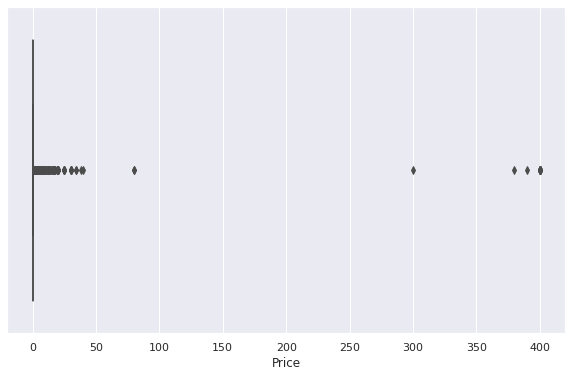

In [97]:
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(x='Price',data=df_updated)

Yes, there sre some outliners in Price column, there are some apps whose price is way more than the usual price of the apps

5: B Boxplot of Reviews

<AxesSubplot:xlabel='Reviews'>

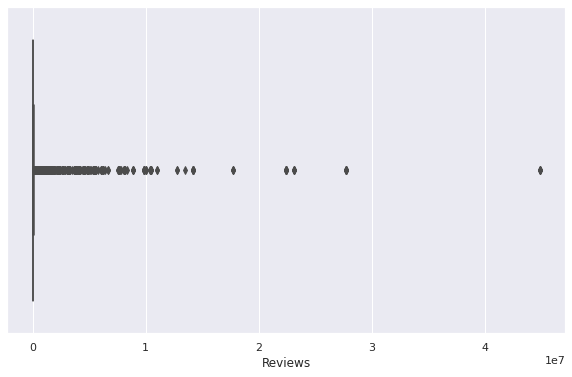

In [98]:
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(x='Reviews',data=df_updated)

The boxplot shows that there are some apps that have relatively very high reviews

5: C Histogram for Rating

(array([  17.,   18.,   39.,   72.,  132.,  408.,  781., 1406., 3212.,
        1632.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

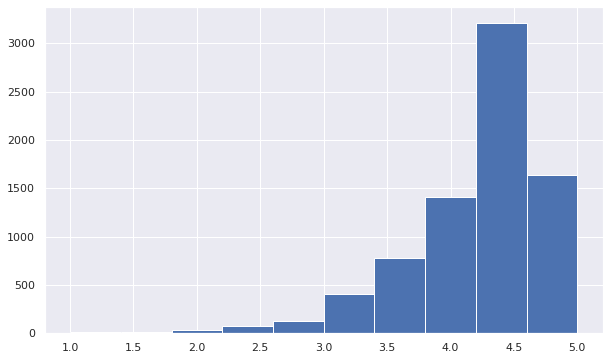

In [100]:
plt.hist(df_updated['Rating'])

The Ratings data is negetively skewed. There are many apps that have high rating between 4 and 5 

5: D Histogram for Size

(array([3245., 1398.,  991.,  606.,  449.,  325.,  226.,  161.,  117.,
         199.]),
 array([8.500000e-03, 1.000765e+01, 2.000680e+01, 3.000595e+01,
        4.000510e+01, 5.000425e+01, 6.000340e+01, 7.000255e+01,
        8.000170e+01, 9.000085e+01, 1.000000e+02]),
 <BarContainer object of 10 artists>)

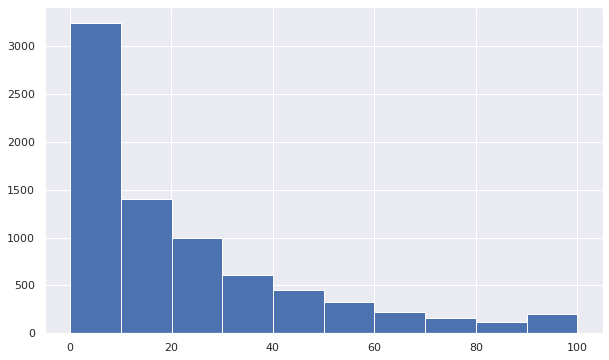

In [101]:
plt.hist(df_updated['Size'])

The Size data is positively skewed. there are a large number of apps that have size between 0 and 10 Mb

6 Outliner Treatment

6A:Check and drop the records with price>200 

In [103]:
# 1 Check the records with price>$200

df_updated[df_updated['Price']>200].index.shape

(15,)

In [106]:
# 2 drop the records with price > $200

df_updated.drop(df_updated[df_updated['Price']>200].index, inplace= True)

/tmp/ipykernel_548/2403394383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated.drop(df_updated[df_updated['Price']>200].index, inplace= True)


In [107]:
df_updated.shape

(7702, 13)

6B: Drop records having more than 2 million reviews.

In [108]:
df_updated.drop(df_updated[df_updated['Reviews']>2000000].index,inplace=True)

/tmp/ipykernel_548/3521188185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated.drop(df_updated[df_updated['Reviews']>2000000].index,inplace=True)


In [109]:
df_updated.shape

(7483, 13)

6C: High number of installs should be dropped

6C: 1: Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

In [110]:
df_updated.quantile([0.1,0.25,0.5,0.7,0.9,0.95,0.99],axis=0)

,Rating,Reviews,Size,Installs,Price
0.10,3.5,13.00,2.5,1000.0,0.00
0.25,4.0,99.00,5.1,10000.0,0.00
0.50,4.3,2026.00,14.0,100000.0,0.00
0.70,4.5,20295.60,26.0,1000000.0,0.00
0.90,4.7,180385.40,56.0,10000000.0,0.00
0.95,4.8,407660.30,72.9,10000000.0,1.99
0.99,5.0,1242884.16,96.0,50000000.0,8.99


6C: 2: dropping values more than cutoff of 95 percentile 

In [112]:
df_updated.drop(df_updated[df_updated['Installs']>10000000.0].index,inplace=True)

/tmp/ipykernel_548/1931617360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated.drop(df_updated[df_updated['Installs']>10000000.0].index,inplace=True)


In [113]:
df_updated.shape

(7307, 13)

7: Bivariate Analysis

7 : 1.	Make scatter plot/joinplot for Rating vs. Price

<AxesSubplot:xlabel='Rating', ylabel='Price'>

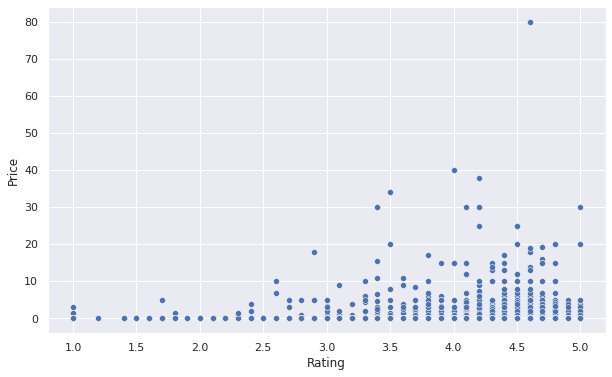

In [115]:
sns.scatterplot(x ='Rating',y='Price',data=df_updated)

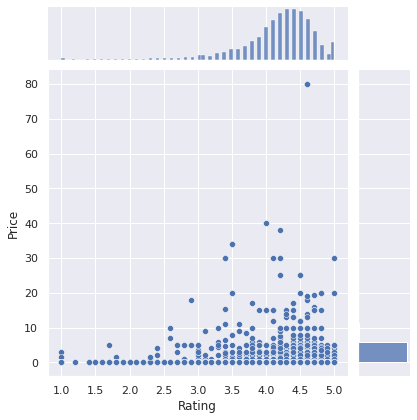

In [117]:
sns.jointplot(x ='Rating',y='Price',data=df_updated)

In [122]:
#The scatter plot and joint plot show positive linear relationship; 
#as the price of an app increases its rating also increases
#This shows that pricier apps are rated better

7: 2.	Make scatter plot/joinplot for Rating vs. Size

<AxesSubplot:xlabel='Rating', ylabel='Size'>

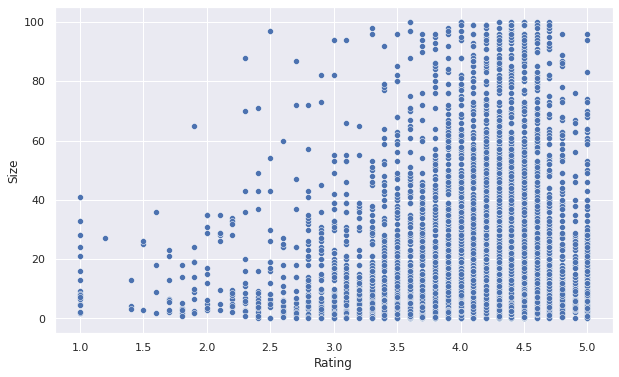

In [120]:
sns.scatterplot(x ='Rating',y='Size',data=df_updated)

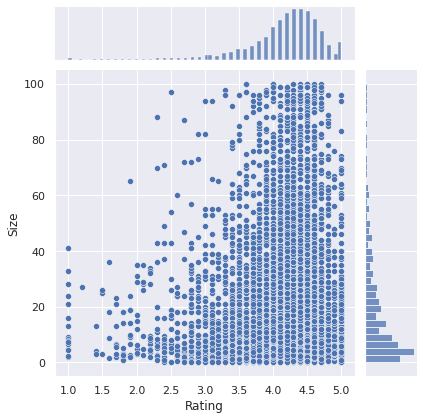

In [121]:
sns.jointplot(x ='Rating',y='Size',data=df_updated)

In [123]:
#Both scatter plot and joint plot show a positive linear relationship; 
#as the Size increases the Ratings increases. 
#This shows that the heavier apps are rated better

7: 3.	Make scatter plot/joinplot for Rating vs. Reviews

<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

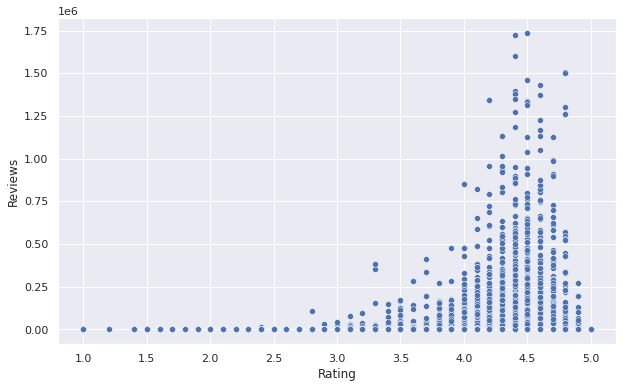

In [126]:
sns.scatterplot(x ='Rating',y='Reviews',data=df_updated)

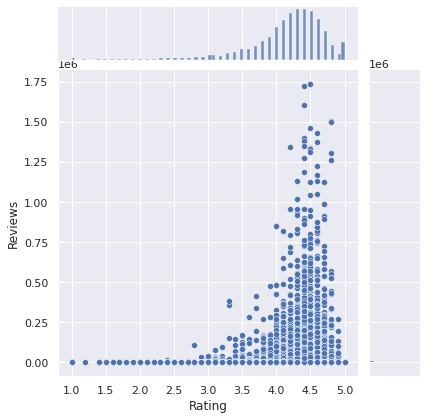

In [127]:
sns.jointplot(x ='Rating',y='Reviews',data=df_updated)

In [128]:
#The plot shows a positive linear relationship between Ratings and Reviews.
#More reviews imply better ratings

7:4.	Make boxplot for Rating vs. Content Rating

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

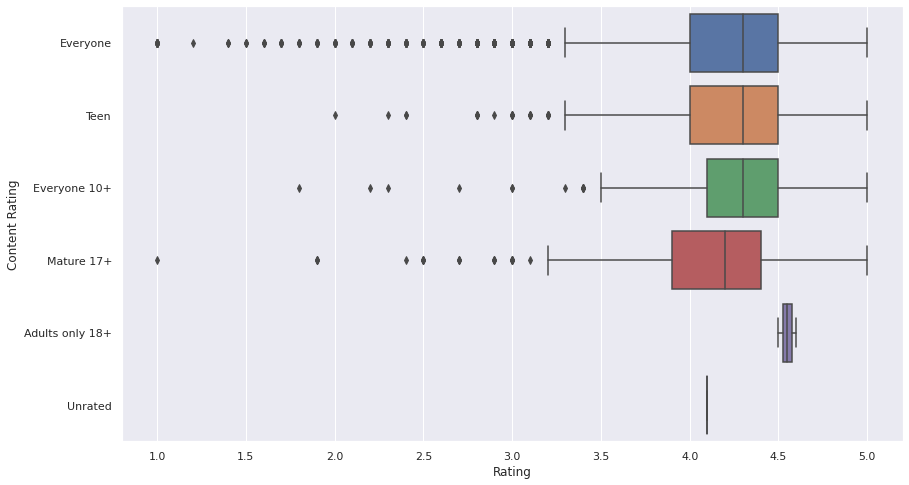

In [129]:
sns.set(rc={'figure.figsize':(14,8)})
sns.boxplot(x= 'Rating', y= 'Content Rating', data = df_updated)

In [130]:
#The above box plot shows the apps for Everyone is worst rated becauseit has the highest number of outliers 
#This is followed by apps for Mature 17+ and Everyone 10+ along with Teen. 
#The app catergory Adults only 18+ is rated better than the others and falls under most liked type

7: 5.	Make boxplot for Ratings vs. Category

<AxesSubplot:xlabel='Rating', ylabel='Category'>

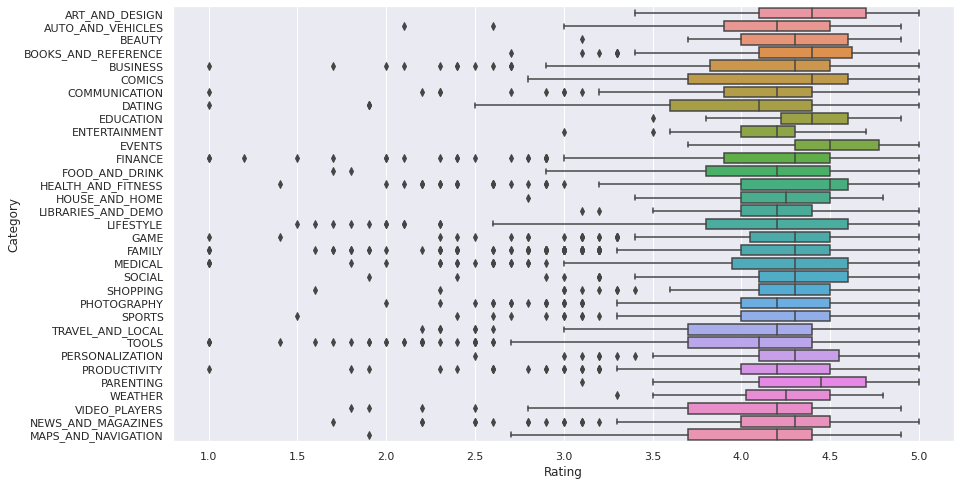

In [131]:
sns.set(rc={'figure.figsize':(14,8)})
sns.boxplot(x= 'Rating', y= 'Category', data = df_updated)

In [132]:
#from the above boxplot, the category Events has the best rating

8: Data Processing

In [155]:
#firstly creating copy of df_updated to make all edits
inp1=df_updated.copy()

In [156]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


8: 1.	Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [157]:
inp1.skew()

/tmp/ipykernel_548/3545313420.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inp1.skew()


Rating      -1.692510
Reviews      5.305328
Size         1.533259
Installs     1.922597
Price       15.724184
dtype: float64

In [158]:
#Apply log transformations to Review
rev_skew=np.log1p(inp1['Reviews'])
inp1['Reviews']=rev_skew

In [152]:
rev_skew.skew()

-1.7291290330990083

In [160]:
#Apply log transformations to Installs
inst_skew=np.log1p(inp1['Installs'])
inp1['Installs']=inst_skew

In [161]:
inst_skew.skew()

-0.3930918801065247

In [162]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19.0,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8.7,15.424949,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2.8,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5.6,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


8:2 Dropping the columns- App, Last Updated, Current Ver, Type, & Andriod Ver as these won't be useful for our model

In [163]:
inp1.drop(['App','Last Updated','Current Ver','Android Ver','Type'],axis=1,inplace=True)
inp1.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19.0,9.210440,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14.0,13.122365,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8.7,15.424949,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2.8,11.512935,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5.6,10.819798,0.0,Everyone,Art & Design


In [164]:
inp1.shape

(7307, 8)

8: 3.	Get dummy columns for Category, Genres, and Content Rating. 

In [166]:
#create a copy inp2
inp2=inp1.copy()
inp2.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19.0,9.210440,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14.0,13.122365,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8.7,15.424949,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2.8,11.512935,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5.6,10.819798,0.0,Everyone,Art & Design


In [167]:
inp2.shape

(7307, 8)

In [169]:
#Get dummies for Category,Genres and Content Rating while deleting Category column
inp2=pd.get_dummies(inp2)
inp2.shape

(7307, 156)

In [170]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8.7,15.424949,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2.8,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5.6,10.819798,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


9: Train-test-split Method

In [172]:
#9.1 determine features and labels
y=inp2['Rating']
x=inp2.drop('Rating',axis=1)

In [183]:
#10 Split the data into test and train

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [184]:
#11 Model Building 
# a.•	Use linear regression as the technique

from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [185]:
#11a Predict the test data

y_pred=LR.predict(x_test)
y_pred

array([4.01123419, 3.86378573, 4.11990303, ..., 4.01878505, 4.39215497,
       3.85114515])

In [186]:
#11b Evaluate the model withthe r2 score

from sklearn.metrics import r2_score

In [187]:
R2=r2_score(y_test,y_pred)
R2

0.10998192806560725

In [188]:
print("The R2 value of the Test Set is : {}".format(R2))

The R2 value of the Test Set is : 0.10998192806560725
